In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [145]:
df_5sec = pd.read_csv('dataset_5secondWindow.csv', index_col=[0])
df_halfsec = pd.read_csv('dataset_halfSecondWindow.csv', index_col=[0])

In [146]:
df_5sec


,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,14125,4.0,NaN,100.0,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U2
5889,19582,32.0,NaN,10.0,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,...,NaN,NaN,NaN,NaN,31.960054,31.960054,31.960054,NaN,Train,U3
5890,16178,86.0,NaN,100.0,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
5891,10973,199.0,NaN,100.0,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,...,NaN,NaN,NaN,NaN,1.090415,1.090415,1.090415,NaN,Still,U10


In [147]:
df_5sec.shape

(5893, 70)

In [148]:
df_5sec = df_5sec.drop('activityrecognition#0', axis=1)

In [149]:
df_5sec.isnull().sum().sort_values()[50:]

android.sensor.light#min            1512
sound#std                           1831
speed#max                           2373
speed#min                           2373
speed#mean                          2373
android.sensor.light#std            3769
android.sensor.pressure#mean        3975
android.sensor.pressure#min         3975
android.sensor.pressure#max         3975
android.sensor.step_counter#max     4406
android.sensor.step_counter#min     4406
android.sensor.step_counter#mean    4406
speed#std                           4575
android.sensor.pressure#std         4765
android.sensor.proximity#mean       4774
android.sensor.proximity#min        4774
android.sensor.proximity#max        4774
android.sensor.proximity#std        5610
android.sensor.step_counter#std     5661
dtype: int64

In [150]:
perc = 75.0
min_count =  int(((100-perc)/100)*df_5sec.shape[0] + 1)
df_5sec = df_5sec.dropna( axis=1, 
                thresh=min_count)

In [130]:
df_5sec.shape

(5893, 62)

In [131]:
df_5sec.describe()

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,android.sensor.step_counter#mean,android.sensor.step_counter#min,android.sensor.step_counter#max,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5094.000000,5094.000000,5094.000000,...,1487.000000,1487.000000,1487.000000,4899.000000,4899.000000,4899.000000,4062.000000,3520.000000,3520.000000,3520.000000
mean,10685.407263,117.731716,87.718310,10.007976,8.426262,12.247691,0.982987,0.759280,0.743872,0.771629,...,10112.523523,10112.205783,10112.769334,78.724855,78.451658,78.997213,1.913065,8.235254,8.216747,8.253528
std,6921.229833,126.474151,24.562728,0.655949,1.783007,5.178436,1.505615,0.251174,0.255232,0.251401,...,11067.556460,11067.525944,11067.568076,14.025440,14.262912,13.889766,3.290193,11.870711,11.866102,11.877158
min,0.000000,3.000000,3.000000,7.369055,0.337166,8.801019,0.001286,0.007770,0.007616,0.007874,...,28.000000,28.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4502.000000,31.000000,90.000000,9.737143,7.805295,10.015566,0.078055,0.640486,0.612155,0.651863,...,1767.000000,1767.000000,1767.000000,72.834623,72.233399,73.302235,0.034126,0.000431,0.000000,0.000431
50%,10959.000000,70.000000,100.000000,9.850143,9.123124,10.602081,0.369163,0.840643,0.818037,0.859326,...,6096.000000,6096.000000,6096.000000,84.035672,83.859708,84.496874,0.806102,1.710000,1.700000,1.710000
75%,17049.000000,152.000000,100.000000,10.078998,9.691731,12.291575,1.058376,0.963207,0.960858,0.971703,...,12992.250000,12987.000000,12995.000000,89.746162,89.743333,89.747576,2.253633,10.250000,10.250000,10.250000
max,22045.000000,682.000000,100.000000,17.427391,12.115013,66.886376,12.879851,1.000000,1.000000,1.000000,...,33350.500000,33346.000000,33355.000000,90.308734,90.308734,90.308734,26.835546,51.360060,51.360060,51.360060


In [151]:
df_5sec.groupby('user').mean()

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,android.sensor.step_counter#mean,android.sensor.step_counter#min,android.sensor.step_counter#max,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max
user,,,,,,,,,,,,,,,,,,,,,
U1,3571.569231,146.055870,86.505668,10.019784,8.685676,11.786943,0.944291,0.858519,0.846474,0.869516,...,2549.854545,2549.756818,2549.952273,87.544779,87.435801,87.647389,1.029367,9.905890,9.904783,9.906997
U10,11414.527307,147.717514,92.261770,9.880349,8.668315,11.611312,0.578305,0.680919,0.656505,0.704838,...,7132.203030,7132.175758,7132.230303,60.318205,59.455744,61.213029,4.161777,1.349853,1.349167,1.350539
U11,20741.910180,80.107784,90.011976,9.829491,8.647890,11.128788,0.528092,0.773309,0.765847,0.780863,...,1711.000000,1711.000000,1711.000000,82.536167,82.170237,82.903527,2.252492,13.860554,13.738325,13.963508
U12,16524.437805,80.270732,92.081707,10.157250,8.212239,14.378786,1.155216,0.499645,0.469746,0.513935,...,20374.933440,20373.966746,20375.646081,76.879022,76.561146,77.202346,1.825030,9.045448,9.005208,9.088944
U13,9966.900000,68.755556,85.166667,9.791253,8.077742,11.630807,0.836949,0.717580,0.711235,0.724702,...,NaN,NaN,NaN,80.848218,80.251585,81.457902,2.160326,17.380017,17.369075,17.390958
U2,14556.361624,51.162362,91.512915,10.168127,6.507070,13.130686,2.484135,0.893116,0.884398,0.901210,...,1648.772189,1648.692308,1648.852071,75.044554,74.872300,75.216808,3.692060,2.461943,2.461710,2.462176
U3,19647.090634,89.574018,75.891239,9.995616,8.180585,12.415206,1.283142,0.843755,0.831285,0.857380,...,23936.187500,23936.187500,23936.187500,67.475142,67.366767,67.560682,3.212688,7.893102,7.893102,7.893102
U4,9187.581498,58.806167,97.881057,10.064068,7.628333,13.296926,1.439556,NaN,NaN,NaN,...,NaN,NaN,NaN,64.131527,63.229693,65.071980,4.422054,40.032500,40.032500,40.032500
U5,20300.058824,23.882353,97.294118,10.596119,5.970352,19.504172,3.009354,0.778137,0.762484,0.792619,...,463.000000,463.000000,463.000000,75.592955,75.229193,75.956716,2.434690,0.677729,0.676450,0.679008


In [133]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_5sec['android.sensor.accelerometer#mean'], df_5sec['android.sensor.accelerometer#min'], df_5sec['android.sensor.accelerometer#max'], df_5sec['android.sensor.accelerometer#std'])
print(fvalue, pvalue)
# The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant 
# differences among columns.
# F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.

17176.430583728765 0.0


In [166]:
df_filled = df_5sec.fillna(-999)
#df_mean = df_5sec.groupby("user").transform(lambda x: x.fillna(x.mean()))
df_mean = df_5sec.fillna(df_5sec.groupby('user').transform('mean'))
df_mean_filled = df_mean.fillna(-999)

C:\Users\rujek\AppData\Local\Temp\ipykernel_10896\3423943966.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df_mean = df_5sec.fillna(df_5sec.groupby('user').transform('mean'))


In [169]:
df_mean.isnull().sum().sort_values()

id                                     0
sound#std                              0
sound#max                              0
sound#min                              0
sound#mean                             0
                                    ... 
android.sensor.step_counter#mean    1286
android.sensor.step_counter#max     1286
android.sensor.pressure#min         3269
android.sensor.pressure#mean        3269
android.sensor.pressure#max         3269
Length: 62, dtype: int64

In [153]:
df_mean = pd.concat([df_mean, df_5sec.target, df_5sec.user], axis=1)

In [139]:
df_mean

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,android.sensor.step_counter#max,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,target,user
0,16170,78.0,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,0.029526,...,28966.000000,76.879022,76.561146,77.202346,1.825030,0.000000,0.000000,0.000000,Still,U12
1,15871,145.0,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,0.999946,...,20375.646081,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,Car,U12
2,16811,150.0,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,0.665218,...,20375.646081,76.879022,76.561146,77.202346,1.825030,0.000000,0.000000,0.000000,Still,U12
3,15831,105.0,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,0.998661,...,20375.646081,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,Car,U12
4,876,77.0,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,0.672664,...,2549.952273,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,Car,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,14125,4.0,100.0,10.066610,4.564648,13.414389,3.373972,0.986319,0.974523,0.992084,...,1648.852071,75.044554,74.872300,75.216808,3.692060,2.461943,2.461710,2.462176,Walking,U2
5889,19582,32.0,10.0,9.964271,8.768007,11.454213,0.665529,0.648602,0.648343,0.648974,...,23936.187500,67.475142,67.366767,67.560682,3.212688,31.960054,31.960054,31.960054,Train,U3
5890,16178,86.0,100.0,9.812893,9.772881,9.862587,0.017633,0.024392,0.024081,0.024696,...,28966.000000,76.879022,76.561146,77.202346,1.825030,0.000000,0.000000,0.000000,Still,U12
5891,10973,199.0,100.0,9.831144,9.807347,9.874450,0.013485,0.481212,0.481209,0.481216,...,6803.000000,60.318205,59.455744,61.213029,4.161777,1.090415,1.090415,1.090415,Still,U10


In [143]:
df_5sec.isnull().sum().sort_values()[40:60]

android.sensor.gyroscope_uncalibrated#max          799
android.sensor.gyroscope_uncalibrated#std          799
android.sensor.gyroscope_uncalibrated#mean         799
android.sensor.game_rotation_vector#std            800
android.sensor.magnetic_field_uncalibrated#std     806
sound#max                                          994
sound#min                                          994
sound#mean                                         994
android.sensor.light#max                          1512
android.sensor.light#min                          1512
android.sensor.light#mean                         1512
sound#std                                         1831
speed#mean                                        2373
speed#min                                         2373
speed#max                                         2373
android.sensor.light#std                          3769
android.sensor.pressure#min                       3975
android.sensor.pressure#mean                      3975
android.se

In [37]:
df_5sec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5893 entries, 0 to 5892
Data columns (total 69 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               5893 non-null   int64  
 1   time                                             5893 non-null   float64
 2   activityrecognition#1                            5893 non-null   float64
 3   android.sensor.accelerometer#mean                5893 non-null   float64
 4   android.sensor.accelerometer#min                 5893 non-null   float64
 5   android.sensor.accelerometer#max                 5893 non-null   float64
 6   android.sensor.accelerometer#std                 5893 non-null   float64
 7   android.sensor.game_rotation_vector#mean         5094 non-null   float64
 8   android.sensor.game_rotation_vector#min          5094 non-null   float64
 9   android.sensor.game_rotation_v

In [38]:
df_5sec.isnull().sum().sort_values()[50:]

android.sensor.light#min            1512
sound#std                           1831
speed#max                           2373
speed#min                           2373
speed#mean                          2373
android.sensor.light#std            3769
android.sensor.pressure#mean        3975
android.sensor.pressure#min         3975
android.sensor.pressure#max         3975
android.sensor.step_counter#max     4406
android.sensor.step_counter#min     4406
android.sensor.step_counter#mean    4406
speed#std                           4575
android.sensor.pressure#std         4765
android.sensor.proximity#mean       4774
android.sensor.proximity#min        4774
android.sensor.proximity#max        4774
android.sensor.proximity#std        5610
android.sensor.step_counter#std     5661
dtype: int64

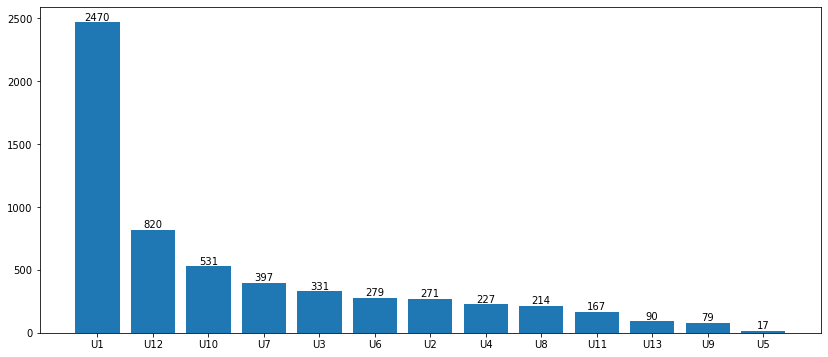

In [39]:
#df_5sec.user.value_counts().index
fig, ax = plt.subplots(figsize=(14,6)) 
a = df_5sec.user.value_counts().index
b = df_5sec.user.value_counts()
bars = ax.bar(a, b)
ax.bar_label(bars)
#plt.bar(a,b)
plt.show()

#fig, ax = plt.subplots()
#bars = ax.barh(indexes, values)
#ax.bar_label(bars)

In [40]:
df_5sec.target.value_counts()

Car        1180
Still      1179
Train      1179
Bus        1178
Walking    1177
Name: target, dtype: int64

In [184]:
def check_models(df):
    df = pd.get_dummies(df, drop_first=True)
    x = df.drop(['target_Car','target_Still','target_Train','target_Walking'], axis = 1)
    y = df.iloc[:,-16:-12]
    return x, y

#x, y = check_models(df_5sec)
x, y = check_models(df_filled)
#x, y = check_models(df_mean)
#x, y = check_models(df_mean_filled)

In [185]:
#df_5sec = pd.get_dummies(df_5sec, drop_first=True)
#df_filled = pd.get_dummies(df_filled, drop_first=True)

In [186]:
#df_5sec.iloc[0:3, -16:-12]

In [187]:
# x and y
#x = df_5sec.drop(['target_Car','target_Still','target_Train','target_Walking'], axis = 1)
#y = df_5sec.iloc[:,-16:-12]
#x2 = df_filled.drop(['target_Car','target_Still','target_Train','target_Walking'], axis = 1)
#y2 = df_filled.iloc[:,-16:-12]

In [188]:
# train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=0)

In [189]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

In [190]:
classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  #"AdaBoost":AdaBoostClassifier(),
  #"Skl GBM":GradientBoostingClassifier(),
  #"XGBoost":XGBClassifier(),
  #"LightGBM":LGBMClassifier(),
  #"CatBoost":CatBoostClassifier()
   }

In [191]:
import time
from sklearn import metrics

In [192]:
results = pd.DataFrame({'Model': [], 'MSE': [], 'MAE': [], " % error": [], 'Time': []})

#rang = abs(y_train.max()) - abs(y_train.min())

for model_name, model in classifiers.items():
    
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_test)
    
    results = results.append({"Model":    model_name,
                              "MSE": metrics.mean_squared_error(y_test, pred),
                              "MAE": metrics.mean_absolute_error(y_test, pred),
                              " % error": metrics.mean_squared_error(y_test, pred), #/ rang,
                              "Accuracy Score": model.score(x_test,y_test),
                              "Time":     total_time},
                              ignore_index=True)


results_ord = results.sort_values(by=['MSE'], ascending=True, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['MSE', 'MAE'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\rujek\AppData\Local\Temp\ipykernel_10896\1812072414.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\rujek\AppData\Local\Temp\ipykernel_10896\1812072414.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\rujek\AppData\Local\Temp\ipykernel_10896\1812072414.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,


,Model,MSE,MAE,% error,Time,Accuracy Score
1,Extra Trees,0.002404,0.433399,0.002404,0.614594,0.992081
2,Random Forest,0.005090,1.046663,0.005090,2.050553,0.982466
3,Decision Tree,0.015979,2.063207,0.015979,0.241285,0.960973


In [193]:
#min max scaling
#  mean - min / (max - min)
'''
df_5sec['accelerometer'] = (df_5sec.iloc[:, 3] - df_5sec.iloc[:, 4]) / (df_5sec.iloc[:, 5] - df_5sec.iloc[:, 4])
df_5sec['game_rotation'] = (df_5sec.iloc[:, 7] - df_5sec.iloc[:, 8]) / (df_5sec.iloc[:, 9] - df_5sec.iloc[:, 8])
df_5sec['gravity'] = (df_5sec.iloc[:, 11] - df_5sec.iloc[:, 12]) / (df_5sec.iloc[:, 13] - df_5sec.iloc[:, 12])
df_5sec['gyroscope'] = (df_5sec.iloc[:, 15] - df_5sec.iloc[:, 16]) / (df_5sec.iloc[:, 17] - df_5sec.iloc[:, 16])
df_5sec['gyroscope_uncalibrated'] = (df_5sec.iloc[:, 19] - df_5sec.iloc[:, 20]) / (df_5sec.iloc[:, 21] - df_5sec.iloc[:, 20])
df_5sec['light'] = (df_5sec.iloc[:, 23] - df_5sec.iloc[:, 24]) / (df_5sec.iloc[:, 25] - df_5sec.iloc[:, 24])
df_5sec['linear_acceleration'] = (df_5sec.iloc[:, 27] - df_5sec.iloc[:, 28]) / (df_5sec.iloc[:, 29] - df_5sec.iloc[:, 28])
df_5sec['magnetic_field'] = (df_5sec.iloc[:, 31] - df_5sec.iloc[:, 32]) / (df_5sec.iloc[:, 33] - df_5sec.iloc[:, 32])
df_5sec['orientation'] = (df_5sec.iloc[:, 35] - df_5sec.iloc[:, 36]) / (df_5sec.iloc[:, 37] - df_5sec.iloc[:, 36])
df_5sec['pressure'] = (df_5sec.iloc[:, 39] - df_5sec.iloc[:, 40]) / (df_5sec.iloc[:, 41] - df_5sec.iloc[:, 40])
df_5sec['proximity'] = (df_5sec.iloc[:, 43] - df_5sec.iloc[:, 44]) / (df_5sec.iloc[:, 45] - df_5sec.iloc[:, 44])
df_5sec['rotation_vector'] = (df_5sec.iloc[:, 47] - df_5sec.iloc[:, 48]) / (df_5sec.iloc[:, 49] - df_5sec.iloc[:, 48])
df_5sec['step_counter'] = (df_5sec.iloc[:, 51] - df_5sec.iloc[:, 52]) / (df_5sec.iloc[:, 53] - df_5sec.iloc[:, 52])
df_5sec['sound'] = (df_5sec.iloc[:, 55] - df_5sec.iloc[:, 56]) / (df_5sec.iloc[:, 57] - df_5sec.iloc[:, 56])
df_5sec['speed'] = (df_5sec.iloc[:, 59] - df_5sec.iloc[:, 60]) / (df_5sec.iloc[:, 61] - df_5sec.iloc[:, 60])
'''


"\ndf_5sec['accelerometer'] = (df_5sec.iloc[:, 3] - df_5sec.iloc[:, 4]) / (df_5sec.iloc[:, 5] - df_5sec.iloc[:, 4])\ndf_5sec['game_rotation'] = (df_5sec.iloc[:, 7] - df_5sec.iloc[:, 8]) / (df_5sec.iloc[:, 9] - df_5sec.iloc[:, 8])\ndf_5sec['gravity'] = (df_5sec.iloc[:, 11] - df_5sec.iloc[:, 12]) / (df_5sec.iloc[:, 13] - df_5sec.iloc[:, 12])\ndf_5sec['gyroscope'] = (df_5sec.iloc[:, 15] - df_5sec.iloc[:, 16]) / (df_5sec.iloc[:, 17] - df_5sec.iloc[:, 16])\ndf_5sec['gyroscope_uncalibrated'] = (df_5sec.iloc[:, 19] - df_5sec.iloc[:, 20]) / (df_5sec.iloc[:, 21] - df_5sec.iloc[:, 20])\ndf_5sec['light'] = (df_5sec.iloc[:, 23] - df_5sec.iloc[:, 24]) / (df_5sec.iloc[:, 25] - df_5sec.iloc[:, 24])\ndf_5sec['linear_acceleration'] = (df_5sec.iloc[:, 27] - df_5sec.iloc[:, 28]) / (df_5sec.iloc[:, 29] - df_5sec.iloc[:, 28])\ndf_5sec['magnetic_field'] = (df_5sec.iloc[:, 31] - df_5sec.iloc[:, 32]) / (df_5sec.iloc[:, 33] - df_5sec.iloc[:, 32])\ndf_5sec['orientation'] = (df_5sec.iloc[:, 35] - df_5sec.iloc[:,

In [194]:
#df_5sec.drop(df_5sec.iloc[:, 3:67], inplace = True, axis = 1)


In [195]:
#df_5sec.head()